In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
from matplotlib.pyplot import cm
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
cmaps = OrderedDict()
import requests
import sys
import re
import pickle
import mdtraj as md
from colabfold import colabfold as cf

In [2]:
a=open('./seq.a3m','r').readlines()
seq_segs=a[1][1:-1].split('\t')
seq_segs_index=[a.index(f'>{seq_segs[i]}\n') for i in range(len(seq_segs))]
save_msa=[0]
b=a[:3]
for i in range(len(seq_segs_index)):
    if i not in save_msa:
        b+=a[seq_segs_index[i]:seq_segs_index[i]+2]
    else:
        if i==len(seq_segs_index)-1:
            b+=a[seq_segs_index[i]:]
        else:
            b+=a[seq_segs_index[i]:seq_segs_index[i+1]]
c=open('./seq_custom.a3m','w')
for i in b:
    c.write(i)
c.close()

In [3]:
!colabfold_batch seq_custom.a3m result_example_mono  --model-type 'AlphaFold2-ptm'


2022-09-08 16:59:06,394 Running colabfold 1.2.0 (b532e910b15434f707f0b7460abc25c70fcb9b26)
2022-09-08 16:59:06,409 Found 5 citations for tools or databases
2022-09-08 16:59:13,833 Query 1/1: seq_custom (length 109)
2022-09-08 16:59:14,010 Running model_3 with seed 6650
2022-09-08 17:02:38,419 model_3 took 194.8s (3 recycles) with pLDDT 79.6 and ptmscore 0.602
2022-09-08 17:02:45,782 Running model_4 with seed 6650
2022-09-08 17:02:57,084 model_4 took 9.8s (3 recycles) with pLDDT 74.8 and ptmscore 0.589
2022-09-08 17:03:02,882 Running model_5 with seed 6650
2022-09-08 17:03:14,126 model_5 took 9.8s (3 recycles) with pLDDT 75.8 and ptmscore 0.593
2022-09-08 17:03:19,922 Running model_1 with seed 6650
2022-09-08 17:03:31,126 model_1 took 9.8s (3 recycles) with pLDDT 72.6 and ptmscore 0.561
2022-09-08 17:03:36,712 Running model_2 with seed 6650
2022-09-08 17:03:47,878 model_2 took 9.8s (3 recycles) with pLDDT 75.3 and ptmscore 0.605
2022-09-08 17:03:53,615 reranking models by ptmscore
2022-

Rank 1


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

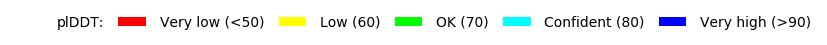

----------------------------------------------------------------------------------------------------
Rank 2


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

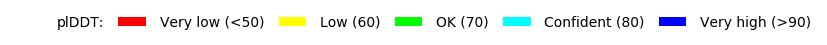

----------------------------------------------------------------------------------------------------
Rank 3


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

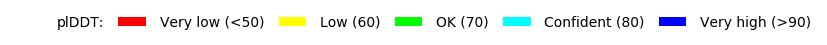

----------------------------------------------------------------------------------------------------
Rank 4


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

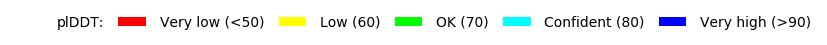

----------------------------------------------------------------------------------------------------
Rank 5


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

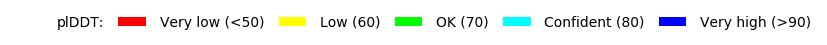

----------------------------------------------------------------------------------------------------


In [15]:
for i in range(1,6):
    print(f'Rank {i}')
    pred_output_path=glob.glob(f'./result_example_mono/seq_custom_unrelaxed_rank_{i}_model_*.pdb')[0]
    cf.show_pdb(pred_output_path, False, False, 'lDDT', Ls=[md.load_pdb(pred_output_path).n_residues]).show()
    cf.plot_plddt_legend().show() 
    print('-'*100)